# DS 3000 - Assignment 3

**Student Name**: [David Yu]

**Date**: [1/22/25]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from December 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [10]:
#run this cell to install the fast parquet library
%pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [26]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet', engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

*Tip*:  Think about whether the data type is accurate for the field. Refer to the data dictionary and review sample values in the dataframe before converting types. **Demonstrate ALL steps.**

In [27]:
# 1. display the dimensions, and indicate if the variables have suitable types.
print("DataFrame Dimensions:")
print(f"Rows: {tripdata_df.shape[0]}")
print(f"Columns: {tripdata_df.shape[1]}")

print("\nInitial Data Types:")
print(tripdata_df.dtypes)

print("Suitable types:")
print("- lpep_pickup_datetime, lpep_dropoff_datetime (datetime64[us]): Suitable for timestamps")
print("- trip_distance (float64): Suitable for distances with decimals")
print("- fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, congestion_surcharge (float64): Suitable for money amount with cents")
print("\nNeeds conversion:")
print("- ID columns (float64): Should be Int64 for categorical identifiers")
print("- passenger_count (float64): Should be Int64 for whole numbers")
print("- store_and_fwd_flag (object): Should be category")
print("- payment_type, trip_type (float64): Should be category")

DataFrame Dimensions:
Rows: 64215
Columns: 20

Initial Data Types:
VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object
Suitable types:
- lpep_pickup_datetime, lpep_dropoff_datetime (datetime64[us]): Suitable for timestamps
- trip_distance

In [28]:
# 2. convert all variables to suitable types
# Integer columns
int_columns = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count']
for col in int_columns:
    tripdata_df[col] = tripdata_df[col].astype('Int64')

# Categorical columns
cat_columns = ['store_and_fwd_flag', 'payment_type', 'trip_type']
for col in cat_columns:
    tripdata_df[col] = tripdata_df[col].astype('category')

print("\nConverted Data Types:")
print(tripdata_df.dtypes)


Converted Data Types:
VendorID                          Int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag             category
RatecodeID                        Int64
PULocationID                      Int64
DOLocationID                      Int64
passenger_count                   Int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                   category
trip_type                      category
congestion_surcharge            float64
dtype: object


## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, **demonstrate** at least two categorical variables and indicate if they are **nominal** or **ordinal** (hint: read the data dictionary above which describes all fields in the data)

*Tip*: Justify why you classified each field as categorical. Provide your reasoning and the evidence to support your decision based on values in the data.

In [31]:
print("Categorical data does exist in this dataset.")

print("store_and_fwd_flag:")
print(tripdata_df['store_and_fwd_flag'].unique())
print("store_and_fwd_flag is categorical data. It is nominal as it only takes in two values, 'Y' and 'N'. It represents whether the trip record was stored in vehicle memory before sending to the server.")

print("\npayment_type unique values:")
print(tripdata_df['payment_type'].unique())
print("payment_type is categorical data. It is nominal as it only takes in four values, 1, 2, 3, and 4. It represents the payment method used for the trip.")

Categorical data does exist in this dataset.
store_and_fwd_flag:
['N', 'Y', NaN]
Categories (2, object): ['N', 'Y']
store_and_fwd_flag is categorical data. It is nominal as it only takes in two values, 'Y' and 'N'. It represents whether the trip record was stored in vehicle memory before sending to the server.

payment_type unique values:
[1.0, 2.0, 3.0, 4.0, NaN]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]
payment_type is categorical data. It is nominal as it only takes in four values, 1, 2, 3, and 4. It represents the payment method used for the trip.


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

*Tip*: When handling missing values, evaluate the row-wise and column-wise data to make informed decisions regarding which approach is suitable. When in doubt, review the Canvas lectures & readings for guidance.

In [48]:
# 1. explain if missing values are an isolated case or a widespread issue?
missing_values = tripdata_df.isnull().sum()
missing_percentages = (tripdata_df.isnull().sum() / len(tripdata_df)) * 100

print("Missing Values")
print("\nAbsolute count of missing values:")
print(missing_values[missing_values > 0])
print("\nPercentage of missing values:")
print(missing_percentages[missing_percentages > 0])

# Check rows with missing values
rows_with_missing = tripdata_df.isnull().any(axis=1).sum()
print(f"\nRows with at least one missing value: {rows_with_missing}")
print(f"Percentage of rows with missing values: {(rows_with_missing/len(tripdata_df))*100:.2f}%")

print("\nThis is a widespread issue because:")
print("1. All rows have at least one missing value")
print("2. ehail_fee column has 100% missing values")
print("3. Seven other columns have ~7.65% missing values each:")
print("- store_and_fwd_flag")
print("- RatecodeID")
print("- passenger_count")
print("- payment_type")
print("- trip_type")
print("- congestion_surcharge")

# 2. what method would you recommend to handle missing data?
print("\nRecommended method to handle missing data:")
print("1. For ehail_fee (100% missing), we can drop this column as it contains no information.")
print("\n2. For columns with ~7.65% missing values, we cab:")
print("- Numeric columns (passenger_count, congestion_surcharge): Use median imputation")
print("- Categorical columns: Create a 'Missing' category")

# 3. Code to handle missing values
print("\nHandling missing values:")

# Create a copy for cleaning
cleaned_df = tripdata_df.copy()

# Drop ehail_fee column (100% missing)
cleaned_df = cleaned_df.drop('ehail_fee', axis=1)

# Handle numeric columns with median imputation
numeric_cols = ['passenger_count', 'congestion_surcharge']
for col in numeric_cols:
   if col in cleaned_df.columns:
       median_value = cleaned_df[col].median()
       cleaned_df[col] = cleaned_df[col].fillna(median_value)

# Handle categorical columns
categorical_cols = ['store_and_fwd_flag', 'payment_type', 'trip_type', 'RatecodeID']
for col in categorical_cols:
   if col in cleaned_df.columns:
       existing_categories = cleaned_df[col].dropna().unique()
       new_categories = list(existing_categories) + ['Missing']
       cleaned_df[col] = cleaned_df[col].astype(str).fillna('Missing')
       cleaned_df[col] = pd.Categorical(cleaned_df[col], categories=new_categories)

print("\nRemaining missing values after cleaning:")
print(cleaned_df.isnull().sum()[cleaned_df.isnull().sum() > 0])

Missing Values

Absolute count of missing values:
store_and_fwd_flag       4912
RatecodeID               4912
passenger_count          4912
ehail_fee               64215
payment_type             4912
trip_type                4914
congestion_surcharge     4912
dtype: int64

Percentage of missing values:
store_and_fwd_flag        7.649303
RatecodeID                7.649303
passenger_count           7.649303
ehail_fee               100.000000
payment_type              7.649303
trip_type                 7.652418
congestion_surcharge      7.649303
dtype: float64

Rows with at least one missing value: 64215
Percentage of rows with missing values: 100.00%

This is a widespread issue because:
1. All rows have at least one missing value
2. ehail_fee column has 100% missing values
3. Seven other columns have ~7.65% missing values each:
- store_and_fwd_flag
- RatecodeID
- passenger_count
- payment_type
- trip_type
- congestion_surcharge

Recommended method to handle missing data:
1. For ehail_fee

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found. **`NOTE`: The issues that you found should not include any aspects from the previous questions.**
2. write suitable code to handle the invalid data that you found.

In [54]:
# 1. demonstrate at least three issues that you found.
# Check for zero or negative trip distances
print("1. Invalid Trip Distances:")
print(f"Zero distances: {(tripdata_df['trip_distance'] == 0).sum()}")
print(f"Negative distances: {(tripdata_df['trip_distance'] < 0).sum()}")

# Check for logical time inconsistencies
print("\n2. Time Inconsistencies:")
time_diff = (tripdata_df['lpep_dropoff_datetime'] - tripdata_df['lpep_pickup_datetime']).dt.total_seconds()
negative_time = (time_diff < 0).sum()
zero_time = (time_diff == 0).sum()
print(f"Trips with negative duration: {negative_time}")
print(f"Trips with zero duration: {zero_time}")

# Check for negative values in monetary columns
print("\n3. Negative Values in Monetary Columns:")
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
               'total_amount', 'congestion_surcharge']
for col in monetary_cols:
   neg_count = (tripdata_df[col] < 0).sum()
   if neg_count > 0:
       print(f"{col}: {neg_count} negative values")

# 2. write suitable code to handle the invalid data that you found
for col in monetary_cols:
   cleaned_df[col] = cleaned_df[col].apply(lambda x: abs(x) if x < 0 else x)

# Handle invalid trip distances
cleaned_df.loc[cleaned_df['trip_distance'] < 0, 'trip_distance'] = None
cleaned_df['zero_distance_flag'] = cleaned_df['trip_distance'] == 0

# Handle time inconsistencies
cleaned_df['trip_duration'] = (cleaned_df['lpep_dropoff_datetime'] - 
                            cleaned_df['lpep_pickup_datetime']).dt.total_seconds()
cleaned_df['invalid_time_flag'] = cleaned_df['trip_duration'] <= 0

# Handle negative durations
mask = cleaned_df['trip_duration'] < 0
temp_pickup = cleaned_df.loc[mask, 'lpep_pickup_datetime'].copy()
cleaned_df.loc[mask, 'lpep_pickup_datetime'] = cleaned_df.loc[mask, 'lpep_dropoff_datetime']
cleaned_df.loc[mask, 'lpep_dropoff_datetime'] = temp_pickup

cleaned_df['trip_duration'] = (cleaned_df['lpep_dropoff_datetime'] - 
                            cleaned_df['lpep_pickup_datetime']).dt.total_seconds()

# Verify results
print("\nCleaning Results:")
print("Remaining negative monetary values:", 
     sum(cleaned_df[monetary_cols].lt(0).sum()))
print("Remaining negative distances:", 
     (cleaned_df['trip_distance'] < 0).sum())
print("Remaining negative durations:", 
     (cleaned_df['trip_duration'] < 0).sum())


1. Invalid Trip Distances:
Zero distances: 3274
Negative distances: 0

2. Time Inconsistencies:
Trips with negative duration: 0
Trips with zero duration: 85

3. Negative Values in Monetary Columns:
fare_amount: 189 negative values
extra: 87 negative values
mta_tax: 160 negative values
tip_amount: 4 negative values
total_amount: 190 negative values
congestion_surcharge: 6 negative values

Cleaning Results:
Remaining negative monetary values: 0
Remaining negative distances: 0
Remaining negative durations: 0


<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (12 pts) 
Create bar charts that show the following: 
1. the most common way that New Yorkers request/hail a cab. 
2. the data **for each week** to determine if there are patterns in the frequency of trips based on the day of the week (i.e. Sun to Sat).
3. the most common pick-up locations (display the top 5 locations). 
4. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

This bar chart shows the frequency of different trip types in the dataset.


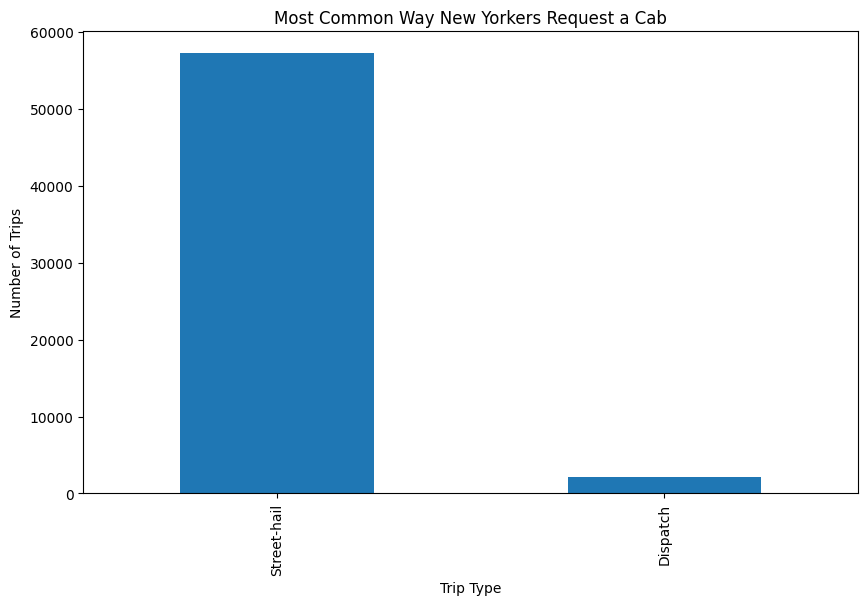

In [111]:
# most common way that New Yorks request a cab
trip_type_map = {1.0: 'Street-hail', 2.0: 'Dispatch', pd.NA: 'Unknown'}
tripdata_df['trip_type_name'] = tripdata_df['trip_type'].map(trip_type_map)

trip_type_counts = tripdata_df['trip_type_name'].value_counts()
ax = trip_type_counts.plot(kind='bar', figsize=(10,6), 
                          title='Most Common Way New Yorkers Request a Cab')
ax.set_xlabel('Trip Type')
ax.set_ylabel('Number of Trips')

print("This bar chart shows the frequency of different trip types in the dataset.")


This bar chart displays the number of trips for each day of the week for each week of December.


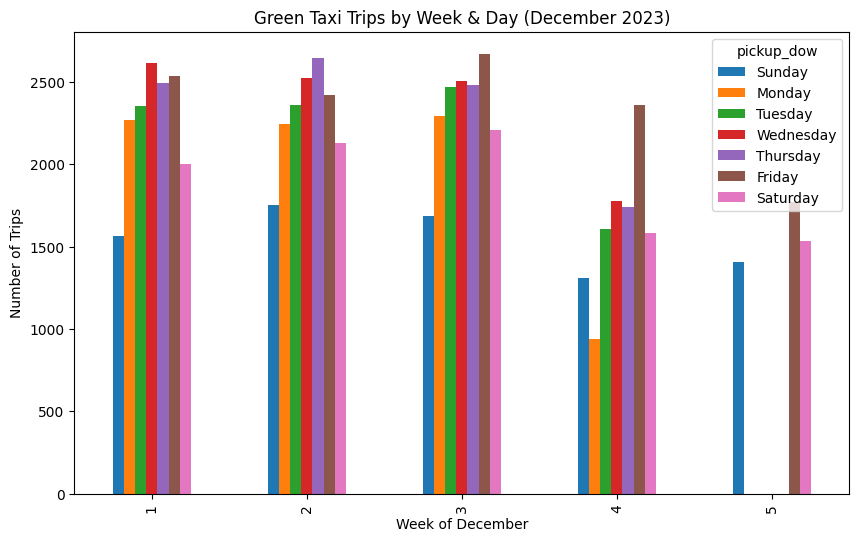

In [110]:
# data for each week to determine if there are patterns in the frequency of trips based on the day of the week (i.e. Sun to Sat).
tripdata_df['pickup_dow'] = tripdata_df['lpep_pickup_datetime'].dt.day_name()
tripdata_df['week'] = ((tripdata_df['lpep_pickup_datetime'].dt.day - 1) // 7) + 1

weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
dow_by_week = tripdata_df.groupby(['week', 'pickup_dow']).size().unstack(fill_value=0)[weekday_order]

ax = dow_by_week.plot.bar(figsize=(10,6), title='Green Taxi Trips by Week & Day (December 2023)')
ax.set_xlabel('Week of December')
ax.set_ylabel('Number of Trips')

print("This bar chart displays the number of trips for each day of the week for each week of December.")

This bar chart shows which PULocationID values appear most frequently in the data


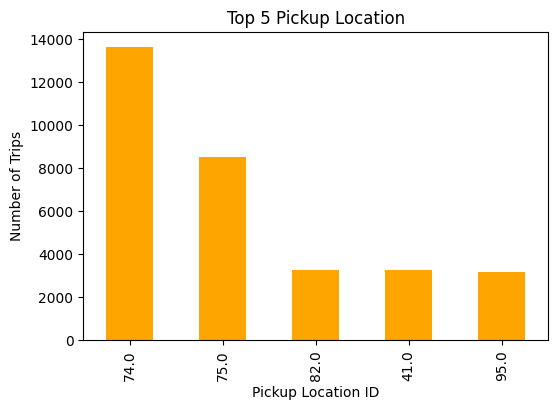

In [139]:
# the most common pick-up locations (display the top 5 locations).
pickup_counts = tripdata_df['PULocationID'].value_counts()

top5_pickups = pickup_counts.head(5)

ax = top5_pickups.plot.bar(
    figsize=(6, 4),
    color='orange',
    title='Top 5 Pickup Location'
)

ax.set_xlabel('Pickup Location ID')
ax.set_ylabel('Number of Trips')

print("This bar chart shows which PULocationID values appear most frequently in the data")


This bar chart shows which DOLocationID values appear most frequently in the data


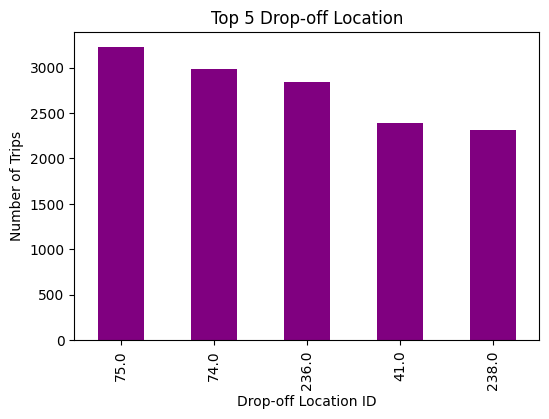

In [108]:
# the most common drop-off locations (display the top 5 locations). 
dropoff_counts = tripdata_df['DOLocationID'].value_counts()

top5_dropoffs = dropoff_counts.head(5)

ax = top5_dropoffs.plot.bar(
    figsize=(6, 4),
    color='purple',
    title='Top 5 Drop-off Location'
)

ax.set_xlabel('Drop-off Location ID')
ax.set_ylabel('Number of Trips')

print("This bar chart shows which DOLocationID values appear most frequently in the data")


## 7. Data Analysis (9 pts)
Write suitable code to answer the following:
1. Calculate the **range** of distances traveled by the green taxis. Then, compare the average distance with the shortest and longest distances. What insights can be drawn about travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

In [123]:
# range of distances traveled by green taxis
min_distance = cleaned_df['trip_distance'].min()
max_distance = cleaned_df['trip_distance'].max()

# average distance
avg_distance = tripdata_df['trip_distance'].mean()

print(f"Shortest distance: {min_distance:.2f} miles")
print(f"Longest distance:  {max_distance:.2f} miles")
print(f"Average distance:  {avg_distance:.2f} miles")

tripdata_df_clean = tripdata_df.copy()

# Drop negative distances or unrealistic outliers
distance_mask = (tripdata_df_clean['trip_distance'] >= 0) & (tripdata_df_clean['trip_distance'] <= 200)
tripdata_df_clean = tripdata_df_clean[distance_mask]

min_distance_clean = tripdata_df_clean['trip_distance'].min()
max_distance_clean = tripdata_df_clean['trip_distance'].max()
avg_distance_clean = tripdata_df_clean['trip_distance'].mean()

print(f"\nAfter cleaning:")
print(f"Shortest distance: {min_distance_clean:.2f} miles")
print(f"Longest distance:  {max_distance_clean:.2f} miles")
print(f"Average distance:  {avg_distance_clean:.2f} miles")

print("\nTravel used by these taxis are usually short distances, with the average distance being 2.6 miles.")


Shortest distance: 0.00 miles
Longest distance:  118988.71 miles
Average distance:  25.05 miles

After cleaning:
Shortest distance: 0.00 miles
Longest distance:  70.52 miles
Average distance:  2.87 miles

Travel used by these taxis are usually short distances, with the average distance being 2.6 miles.


In [131]:
min_fare = tripdata_df['total_amount'].min()
max_fare = tripdata_df['total_amount'].max()

print(f"Min total_amount: {min_fare}")
print(f"Max total_amount: {max_fare}")

tripdata_df_clean = tripdata_df.copy()

# Remove negative total amounts
tripdata_df_clean = tripdata_df_clean[tripdata_df_clean['total_amount'] >= 0]

min_fare_clean = tripdata_df_clean['total_amount'].min()
max_fare_clean = tripdata_df_clean['total_amount'].max()

print(f"\nNew min total_amount: {min_fare_clean}")
print(f"New max total_amount: {max_fare_clean}")


Min total_amount: -221.0
Max total_amount: 1622.6

New min total_amount: 0.0
New max total_amount: 1622.6


In [136]:
# Split the DataFrame into two groups
under_2_df = tripdata_df[tripdata_df['trip_distance'] < 2]
over_2_df  = tripdata_df[tripdata_df['trip_distance'] >= 2]

# Tips for under 2 miles
under_2_tip_min  = under_2_df['tip_amount'].min()
under_2_tip_mean = under_2_df['tip_amount'].mean()
under_2_tip_max  = under_2_df['tip_amount'].max()

# Tips for over 2 miles
over_2_tip_min  = over_2_df['tip_amount'].min()
over_2_tip_mean = over_2_df['tip_amount'].mean()
over_2_tip_max  = over_2_df['tip_amount'].max()

print("Tips for trips < 2 miles")
print(f"Minimum: ${under_2_tip_min:.2f}")
print(f"Average: ${under_2_tip_mean:.2f}")
print(f"Maximum: ${under_2_tip_max:.2f}\n")

print("Tips for trips >= 2 miles")
print(f"Minimum: ${over_2_tip_min:.2f}")
print(f"Average: ${over_2_tip_mean:.2f}")
print(f"Maximum: ${over_2_tip_max:.2f}")

tripdata_df_clean = tripdata_df.copy()

# Remove negative total amounts
tripdata_df_clean = tripdata_df_clean[tripdata_df_clean['total_amount'] >= 0]

under_2_df_clean = tripdata_df_clean[tripdata_df_clean['trip_distance'] < 2]
over_2_df_clean  = tripdata_df_clean[tripdata_df_clean['trip_distance'] >= 2]

# Tips for under 2 miles
under_2_tip_min_clean  = under_2_df_clean['tip_amount'].min()
under_2_tip_mean_clean = under_2_df_clean['tip_amount'].mean()
under_2_tip_max_clean  = under_2_df_clean['tip_amount'].max()

# Tips for over 2 miles
over_2_tip_min_clean  = over_2_df_clean['tip_amount'].min()
over_2_tip_mean_clean = over_2_df_clean['tip_amount'].mean()
over_2_tip_max_clean  = over_2_df_clean['tip_amount'].max()

print("\nAfter cleaning:")
print("Tips for trips < 2 miles")
print(f"Minimum: ${under_2_tip_min_clean:.2f}")
print(f"Average: ${under_2_tip_mean_clean:.2f}")
print(f"Maximum: ${under_2_tip_max_clean:.2f}\n")

print("Tips for trips >= 2 miles")
print(f"Minimum: ${over_2_tip_min_clean:.2f}")
print(f"Average: ${over_2_tip_mean_clean:.2f}")
print(f"Maximum: ${over_2_tip_max_clean:.2f}")


Tips for trips < 2 miles
Minimum: $-0.01
Average: $1.50
Maximum: $150.00

Tips for trips >= 2 miles
Minimum: $0.00
Average: $3.17
Maximum: $100.00

After cleaning:
Tips for trips < 2 miles
Minimum: $0.00
Average: $1.51
Maximum: $150.00

Tips for trips >= 2 miles
Minimum: $0.00
Average: $3.17
Maximum: $100.00


## 8. Findings (2 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

Based on preliminary analysis, I would say this data is not a viable source that can be used to understand how New Yorkers use these taxis. First of all, a lot of data had to be cleaned in order for the findings to be valid. Without any cleaning, there would be a lot of invalid numeric values and crazy outliers that are unreasonable from a real world perspective. For example, before cleaning, we had a longest distance of 118988.71 miles, which is completely unreasonable. There are also a lot of negative values that show up like in the minimum tip given and the minimum trip cost. The data needs a lot of cleaning before we can reasonably use it to understand how New Yorkers use these taxis. 